**Problema** : Riconoscere se il soggetto indossa una mascherina oppure non indossa nessuna protezione.

Vediamo se si modifica su git

This Image classification with Bag of Visual Words technique has three steps:
* **Feature Extraction** :Determination of Image features of a given label.
* **Codebook Construction** : Construction of visual vocabulary by clustering, followed by frequency analysis.
* **Classification** Classification of images based on vocabulary generated using SVM.


Importo le librerie che mi servono

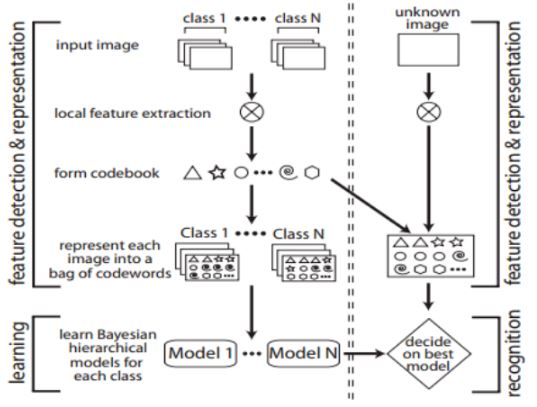

In [1]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
import cv2 as cv
import os
import matplotlib.pyplot as plt
import random
import pylab as pl

In [2]:
train_path="archive/Face Mask Dataset/Train"
class_names=os.listdir(train_path)

In [3]:
print(class_names)

['WithMask', 'WithoutMask']


Creo due contenitori per il percoso delle immagini e la loro classe

In [4]:
image_paths=[]
image_classes=[]

Creare lista per tutti i filename nella directory

In [5]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [6]:
# ciclo for su ogni classe del training set
for training_name in class_names:
    #estraggo la directory delle classi
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)#class 'generator', itero sulla classe 
    image_paths+=class_path #vado a creare una lista della posizione di ogni immagine
#in totale ho 10000 immagini di test, 5000 per ogni classe

In [7]:
image_classes_0=[0]*(len(image_paths)//2)# creo label per ogni classe

In [8]:
image_classes_1=[1]*(len(image_paths)//2)# creo label per ogni classe

In [9]:
image_classes=image_classes_0+image_classes_1
len(image_classes)

10000

ora ad ogni immagine assegno l'etichetta:
* zero = withmask
* uno = withoutmask

In [10]:
D=[]
#la struttura D contiene il path dell'immagine con la sua corrispettiva etichetta
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))
    
print(D[1][0])

archive/Face Mask Dataset/Train\WithMask\100.png


Visualizzo due esempio del mio dataset di training:

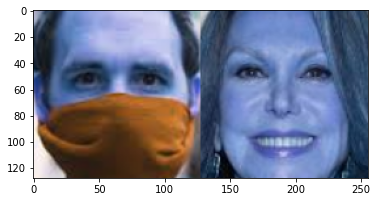

In [11]:
#visualizzo due esempi delle mie due classi 
import numpy as np
import matplotlib.pyplot as plt

img_A =  cv.imread(D[50][0])
img_B =  cv.imread(D[5000][0])

#per visualizzare le due immagini le ho inserite in un numpy array e poi ho plottato l'array
#metodo discutibile, magari da sistemare
dim=(128,128)
img_A_2= cv.resize(img_A,dim)
img_B_2= cv.resize(img_B,dim)
plot_image = np.concatenate((img_A_2, img_B_2), axis=1)

plt.imshow(plot_image)

**Estrazione delle feature con BOW** : creo feature SIFT.

<class 'cv2.xfeatures2d_SIFT'>


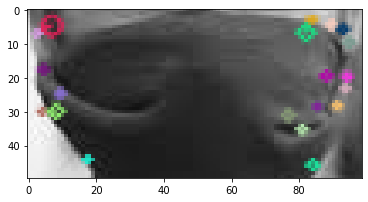

In [12]:


#calcolo che devo fare per ogni immagine e mi creo la mia lista di descrittori che sono le mie SIFT

#carico imamgine
img = cv.imread(D[50][0])
cut_image = img[img.shape[0]//2: img.shape[0], 0:img.shape[1]]


gray= cv.cvtColor(cut_image,cv.COLOR_BGR2GRAY)#la porto in scala di grigi
plt.imshow(gray)

sift = cv.xfeatures2d.SIFT_create() #creo oggetto sift
print(type(sift))

kp = sift.detect(gray,None) #trova i keypoint nell'immagine 
img_1=cv.drawKeypoints(gray,kp,cut_image,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #disegno cerchi intorni ai miei keypoint
plt.imshow(img_1)

kp,des = sift.compute(gray,kp)#calcolo descitori, è un array di N(#keypoint)x128

In [13]:
print(des.shape) 

(21, 128)


Ora vado ad estrarmi i descrittori per ogni immagine del data_set

In [14]:
#oggetto sift già istanziato
tot_list=[]#lista descrittori con immagini associata
des_list=[] #lista per descrittori, la uso dopo
new_D=[]#nuovo dataset con classi e immagini non Null
p=0

from tqdm import tqdm #algoritmo intelligente che calcola tempo di esecuzione rimanente
from time import sleep
from functools import partial
tqdm = partial(tqdm, position=0, leave=True)
#for i in tqdm(range(len(image_paths)), desc='Calcolo Keypoint e descrittori'):
for i in tqdm(range(len(image_paths)), desc='Calcolo Keypoint e descrittori'):
    
    im=cv.imread(D[i][0])
    cut_image = im[im.shape[0]//2: im.shape[0], 0:im.shape[1]]
    cut_image_gray= cv.cvtColor(cut_image,cv.COLOR_BGR2GRAY)#la porto in scala di grigi
    
    kp1, descriptor = sift.detectAndCompute(cut_image_gray,None)
        
    if descriptor is not None:
        #print('indice presente = ',i)
        p+=1
        new_D.append((D[i][0],D[i][1]))
        tot_list.append((D[i][0],descriptor))
        des_list.extend(descriptor) #extend a differenza di append aggiunge un singolo elemento alla volta alla lista
        # es: 'ciao' => 'c' 'i' 'a' 'o'
print('dal mio train set ho tenuto',p,' immagini')

Calcolo Keypoint e descrittori: 100%|██████████| 10000/10000 [00:46<00:00, 213.01it/s]

dal mio train set ho tenuto 9968  immagini


In [15]:
print(len(D))
print(len(tot_list))
print(len(new_D))

10000
9968
9968


Aggiorno le label del mio train set

In [16]:

image_classes_0=[]
image_classes_1=[]

for i in range(len(new_D)):
    
    #D.append((image_paths[i],image_classes[i])
    if(new_D[i][1]==0):
        print(i)
        image_classes_0.append(0)# creo label per ogni classe
    else:
        image_classes_1.append(1)

        
image_classes=image_classes_0+image_classes_1
#img = cv.imread(D[4972][0])
#plt.imshow(img)
#len(image_classes)
#print(image_classes_0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389


4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212


In [17]:
#print(len(des_list))
#print(tot_list[1])
print(len(image_classes))

9968


Implemento algorimto K-means sui descrittori, creo dizionario BOW

Il MiniBarchKmeans è una variante dell'algorimto Kmeans, il quale usa dei mini-bathes per ridurre il tempo di computazione, pur cercando di ottimizzare la stessa funzione obbiettivo.

I mini-batches sono dei subset dell'intero data set, sono randomicamente campionati in ogni iterzione di training.
Questi mini-batch riducono drasticamente la quantità di calcolo necessaria per convergere a una soluzione locale. Però k-means che utilizza dei mini-batch produce dei risultati che sono generalmente di poco peggiori dell'algoritmo standard.

**funzionamento:**
L'algoritmo itera tra due passaggi principali, in modo simile al K-means standard:
* Nel primo passo: i campioni vengono estratti casualmente dal set di dati, per formare un mini-batch. Questi vengono quindi assegnati al centroide più vicino. 
* Nella seconda fase, i centroidi vengono aggiornati. A differenza di k-means, questo viene fatto su una base per campione. Per ogni campione nel mini-batch, il centroide assegnato viene aggiornato prendendo la media in streaming del campione e tutti i campioni precedenti assegnati a quel centroide. Questo ha l'effetto di diminuire la velocità di variazione di un centroide nel tempo. Questi passaggi vengono eseguiti fino al raggiungimento della convergenza o di un numero predeterminato di iterazioni.

MiniBatchKMeans converge più velocemente di KMeans, ma la qualità dei risultati è ridotta. In pratica questa differenza di qualità può essere piuttosto piccola. [Fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)

"Building visual dictionary using cv2.BOWKMeansTrainer is super slow when using > 100 clusters. While using sklearn.cluster.KMeans solves the speed issue, it requires huge amount of memory (8 GB of RAM is still insufficient to handle > 400 clusters). That’s where klearn.cluster.MiniBatchKMeans comes into picture." [Fonte](https://yohanes.gultom.id/2018/05/20/sift-surf-bow-for-big-number-of-clusters/)

In [18]:
''' 
from sklearn.cluster import MiniBatchKMeans

#decido quanti cluster creare e quindi quanto grande sarà il mio dizionario, attenzione a sparsità
dictionary_size=200
print('Creo dizionario BoW usando l\'algoritmo di clustering K-Means con k={}.'.format(dictionary_size))
dictionary = MiniBatchKMeans(n_clusters=dictionary_size, batch_size=100, verbose=0)

n_cluster= numero di cluster che creo, ovvero il numero di centroidi che genera
batch_size= dimnsione del mio mini-batch
verbose= attivata per visualizzare maggiore informazioni
The number of clusters to form as well as the number of centroids to generate.
‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 


dictionary.fit(np.array(des_list))#calcola i centroidi dei miei descrittori suddividendoli in mini-batch
'''

" \nfrom sklearn.cluster import MiniBatchKMeans\n\n#decido quanti cluster creare e quindi quanto grande sarà il mio dizionario, attenzione a sparsità\ndictionary_size=200\nprint('Creo dizionario BoW usando l'algoritmo di clustering K-Means con k={}.'.format(dictionary_size))\ndictionary = MiniBatchKMeans(n_clusters=dictionary_size, batch_size=100, verbose=0)\n\nn_cluster= numero di cluster che creo, ovvero il numero di centroidi che genera\nbatch_size= dimnsione del mio mini-batch\nverbose= attivata per visualizzare maggiore informazioni\nThe number of clusters to form as well as the number of centroids to generate.\n‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. \n\n\ndictionary.fit(np.array(des_list))#calcola i centroidi dei miei descrittori suddividendoli in mini-batch\n"

In [19]:
from scipy.cluster.vq import kmeans,vq

k=20
voc,variance=kmeans(np.array(des_list),k,1)

In [20]:
print(voc[1].shape)

(128,)


In [21]:
''' 
from sklearn.metrics.pairwise import pairwise_distances_argmin
mbk_means_cluster_centers = np.sort(dictionary.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(np.array(des_list), mbk_means_cluster_centers)
  
# print the labels of each data
'''


' \nfrom sklearn.metrics.pairwise import pairwise_distances_argmin\nmbk_means_cluster_centers = np.sort(dictionary.cluster_centers_, axis = 0)\nmbk_means_labels = pairwise_distances_argmin(np.array(des_list), mbk_means_cluster_centers)\n  \n# print the labels of each data\n'

In [22]:
#print(type(dictionary))

In [23]:
print(type(voc))

<class 'numpy.ndarray'>


**creo istogramma delle immagini:**
* 1): mi creo una matrice 10000(#samples)x #_cluster
* 2): per ogni immagine del mio train set vado a prendermi i descrittori di quella immagine.
* 3): Grazie alla funzione vq che prende in input i descrittori dell'immagine e del vocabolario riesco a calcolarmi le visual word presenti nella mia immagine 
* 4): vado ad iterare sulle visual word trovate e assegno +1 per ogni visual che ha la mia immagine

In [24]:
print(len(new_D))
print(len(tot_list))

9968
9968


In [25]:
im_features=np.zeros((len(new_D),k),"float32")#matrice 10000 x #_cluster, numero immagini di test per bins

for i in range(len(new_D)):#per ogni immagine creo struttura con quante visual word contiene 
    
    #print(tot_list[i][1])
    words,distance=vq(tot_list[i][1],voc)
    #ritorna words = Un array di lunghezza M(patch trovate nell'immagine) che contiene l'indice della parola nel dizionario dei codici per ogni osservazione. 
    #riotna distance tra l'osservazione e la piu vicina visual
    #print(words)
    #print(distance)
    for w in words:
        im_features[i][w]+=1#inizialmnete il mio istogramma è tutto a zero[0 0 ... 0 0 0]
        #poi man mano aggiungo le visual word trovate per quell'immagine


**Applico standardizzazione dei dati**

In [26]:
from sklearn.preprocessing import StandardScaler

stdslr=StandardScaler().fit(im_features)# Compute the mean and std to be used for later scaling.
im_features=stdslr.transform(im_features)# Perform standardization by centering and scaling


**Classificazione degli istogrammi con SVM**
* 1)kernel lineare
* 2)Kernel RBF

In [27]:
print(len(im_features))


9968


In [28]:
from sklearn.svm import LinearSVC

SVM_Linear=LinearSVC(max_iter=80000, verbose=1)# C=1
SVM_Linear.fit(im_features,np.array(image_classes))

[LibLinear]

LinearSVC(max_iter=80000, verbose=1)

**Test del Classificatore**
* 1) Prendo immagini di test e ne calcolo i descrittori SIFT
* 2) Creo l'istogramma con il vocabolario allenato in precedenza
* 3) Classifico con SVM appena allenata

In [51]:
des_list_test=[] #creo lista di descrittori per le miei immagini di test 

In [32]:
#creo set di test
test_path="archive/Face Mask Dataset/Test"
class_names_test=os.listdir(test_path)

print(class_names_test)
image_paths_test=[]
image_classes_test=[]

def img_list_test(path):#itero sulla classe
    return (os.path.join(path,f) for f in os.listdir(path))

for test_name in class_names_test: #itero sulle mie due classi in gioco
    dir_=os.path.join(test_path,test_name)#directori dove di trova le immagini
    class_path_test=img_list_test(dir_)
    image_paths_test+=class_path_test#vado a creare una lista della posizione di ogni immagine
    
#NB 483 immagini withMask e 509 without mask 

['WithMask', 'WithoutMask']


In [36]:
#creo test set
len(image_paths_test)
Test_D=[]
for i in range(len(image_paths_test)):
    if (i<483):
        Test_D.append((image_paths_test[i],0))
    else:
        Test_D.append((image_paths_test[i],1)) 

        
#Nb: 0=withMask, 1=withoutMask

('archive/Face Mask Dataset/Test\\WithMask\\Augmented_97_6413107.png', 0)


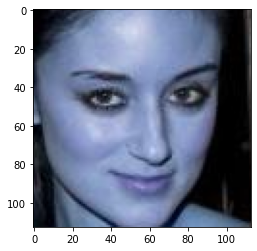

In [46]:
#test del test_D, usato per vedere se avevo classificato correttamente       
img_A_test =  cv.imread(Test_D[800][0])
print(Test_D[481])
plt.imshow(img_A_test)

In [57]:

for image_pat_test in image_paths_test:
    image=cv.imread(image_pat_test)
    cut_image = image[image.shape[0]//2: image.shape[0], 0:image.shape[1]]
    cut_image_gray= cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    kp=sift.detect(cut_image_gray,None)#trovo keypoint
    keypoints_test,descriptor_test= sift.compute(cut_image_gray, kp)#calcolo descrittori keypoint
    if descriptor_test is None: #nella maggior parte delle prove non ho riscontarato descrittori nulli
        print('trovato des null')
    des_list_test.append((image_pat_test,descriptor_test))

Creo il mio istogramma di testing

In [64]:
test_features=np.zeros((len(image_paths_test),k),"float32")#matrice dove raccolgo le feture
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)#controllo le parole trovate in base a quanto distanti sono dai miei cluster
    for w in words:
        test_features[i][w]+=1

In [69]:
#stampo istogrammi, vedo che ci sono delle differenze 
print(test_features[400])
print(test_features[401])
print(test_features[800])
print(test_features[801])

[18.  6.  8.  3. 22.  2.  4. 12.  2.  1.  6.  3.  6.  3.  3.  3. 10.  3.
  2.  1.]
[23.  3.  5.  3. 23.  4.  3.  6.  5.  0.  2.  6.  8.  6.  6.  4. 16.  8.
  0.  4.]
[4. 6. 3. 1. 5. 1. 3. 0. 4. 8. 2. 1. 3. 2. 2. 3. 3. 2. 4. 0.]
[9. 3. 1. 1. 0. 3. 2. 4. 2. 2. 3. 8. 7. 1. 1. 1. 6. 3. 0. 1.]


In [70]:
#normalizzo le feature, abbasso i numeri 
stdslr=StandardScaler().fit(test_features)
test_features_norm=stdslr.transform(test_features)

In [71]:
#mi faccio un'idea delle mie feature normalizzate
print(test_features_norm[400])
print(test_features_norm[401])
print(test_features_norm[800])
print(test_features_norm[801])

[ 0.72317576 -0.05579408  0.48386195 -0.3626051   1.3456433  -0.45996276
 -0.34610254  0.7832098  -0.5530097  -0.751786   -0.04663524 -0.44354627
 -0.18964325 -0.46631578 -0.5406186  -0.36464822  0.13740844 -0.29973644
 -0.31737325 -0.6933215 ]
[ 1.2038716  -0.48045695 -0.01944919 -0.3626051   1.457884   -0.21069586
 -0.5294094  -0.0543153  -0.1290641  -0.87782484 -0.58771306 -0.02168826
  0.06700901 -0.03059969  0.02889678 -0.24165231  0.68373775  0.23600869
 -0.50432944 -0.2391448 ]
[-0.6227724  -0.05579408 -0.35498995 -0.61274713 -0.5624479  -0.5845962
 -0.5294094  -0.89184046 -0.2703793   0.13048576 -0.58771306 -0.7247849
 -0.5746217  -0.61155444 -0.730457   -0.36464822 -0.49997577 -0.40688545
 -0.13041703 -0.8447138 ]
[-0.14207661 -0.48045695 -0.69053066 -0.61274713 -1.1236511  -0.3353293
 -0.7127162  -0.33349034 -0.5530097  -0.6257472  -0.4524436   0.2595504
 -0.06131712 -0.75679314 -0.9202954  -0.6106401  -0.22681113 -0.29973644
 -0.50432944 -0.6933215 ]


In [90]:
#calcolo le classi vere
true_classes=[]
for i in Test_D:
    if i[1]==0:
        true_classes.append("WithMask")
    else:
        true_classes.append("WithoutMask")

In [82]:
#print(true_classes)

In [91]:
predict_classes=[]
for i in SVM_Linear.predict(test_features_norm):
    if i==1:
        predict_classes.append("WithoutMask")
    else:
        predict_classes.append("WithMask")

In [92]:
print((predict_classes))
print((true_classes))

['WithoutMask', 'WithMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithMask', 'WithMask', 'WithMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithMask', 'WithMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithoutMask', 'WithMask', 'WithoutMask', 'WithoutMask', 'Wi

In [93]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.8709677419354839


In [88]:
SVM_Linear.predict(test_features_norm)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,